**1) Import Libraries**

Import required libraries. This cell also sets plotting styles for the notebook.

In [10]:


# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set display options and plotting styles
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

**2) Load Dataset**

Load the Mall Customers dataset from Kaggle and perform initial data inspection.

In [11]:
# Load dataset function
def load_data():
    try:
        # Try to load from local file
        df = pd.read_csv('Mall_Customers.csv')
    except:
        # Otherwise download from URL
        url = "https://raw.githubusercontent.com/krishnaik06/Mall-Customers-Segmentation/master/Mall_Customers.csv"
        df = pd.read_csv(url)

    # Rename columns for clarity
    df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']
    return df

# Load the data
df = load_data()
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset loaded successfully!
Dataset shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2    Male   21            15             81
2           3  Female   20            16              6
3           4  Female   23            16             77
4           5  Female   31            17             40


**3) Data Exploration**

Perform exploratory data analysis and visualize distributions of key variables.

DATA EXPLORATION
Dataset dimensions: (200, 5)

First few rows:
   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2    Male   21            15             81
2           3  Female   20            16              6
3           4  Female   23            16             77
4           5  Female   31            17             40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive statistics:
       CustomerID         Age  AnnualIncome  SpendingScore
count  200.000000  200.000000    200.00000

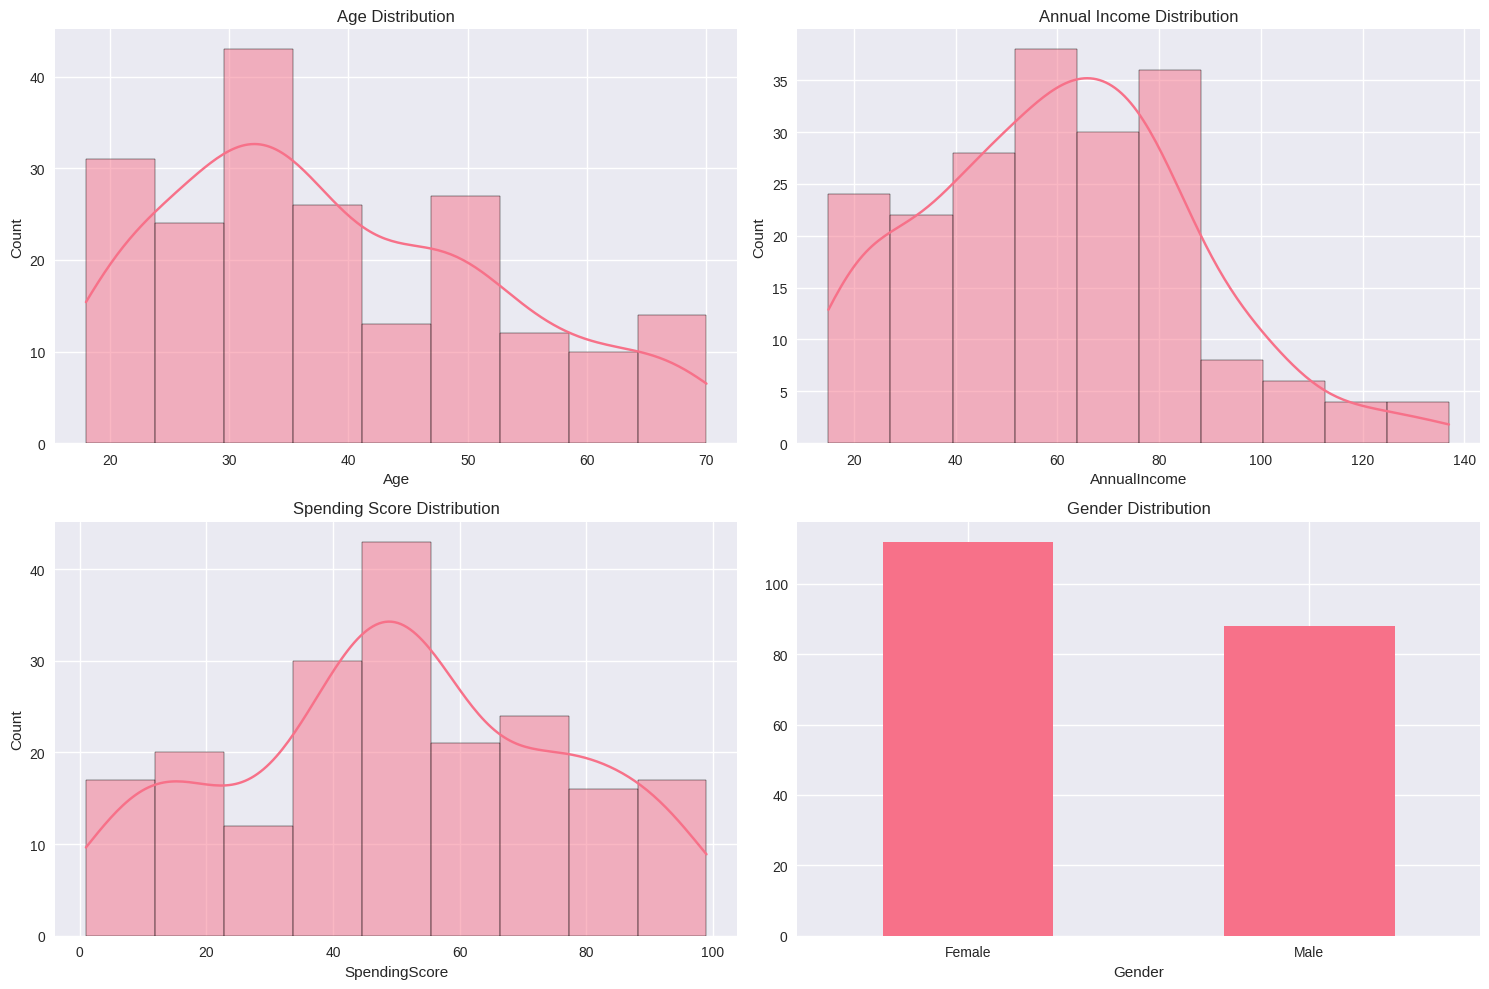

In [12]:
# Data exploration function
def explore_data(df):
    print("="*50)
    print("DATA EXPLORATION")
    print("="*50)

    # Basic information
    print("Dataset dimensions:", df.shape)
    print("\nFirst few rows:")
    print(df.head())

    print("\nDataset info:")
    print(df.info())

    print("\nDescriptive statistics:")
    print(df.describe())

    print("\nMissing values:")
    print(df.isnull().sum())

    # Visualize distributions
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Age distribution
    sns.histplot(df['Age'], kde=True, ax=axes[0,0])
    axes[0,0].set_title('Age Distribution')

    # Annual income distribution
    sns.histplot(df['AnnualIncome'], kde=True, ax=axes[0,1])
    axes[0,1].set_title('Annual Income Distribution')

    # Spending score distribution
    sns.histplot(df['SpendingScore'], kde=True, ax=axes[1,0])
    axes[1,0].set_title('Spending Score Distribution')

    # Gender distribution
    df['Gender'].value_counts().plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Gender Distribution')
    axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=0)

    plt.tight_layout()
    plt.show()

# Execute data exploration
explore_data(df)

**4) Data Preprocessing**

Select features for clustering and apply standardization/normalization.

In [13]:
# Data preprocessing function
def preprocess_data(df):
    # Select features for clustering
    X = df[['AnnualIncome', 'SpendingScore']].copy()

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X, X_scaled, scaler

# Apply preprocessing
X, X_scaled, scaler = preprocess_data(df)
print("Data preprocessing completed!")
print(f"Original data shape: {X.shape}")
print(f"Scaled data shape: {X_scaled.shape}")
print("\nFirst 5 rows of scaled data:")
print(X_scaled[:5])

Data preprocessing completed!
Original data shape: (200, 2)
Scaled data shape: (200, 2)

First 5 rows of scaled data:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


**5) Determine Optimal Clusters**

Use elbow method and silhouette score to find the optimal number of clusters.

DETERMINING OPTIMAL NUMBER OF CLUSTERS


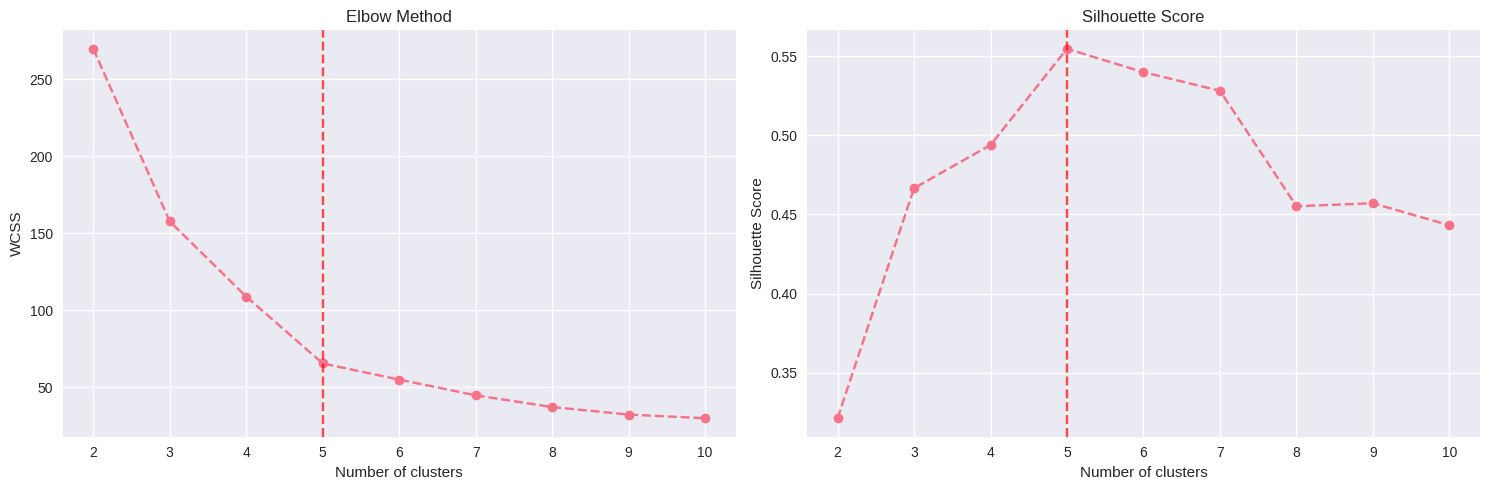

Optimal number of clusters suggested: 5


In [14]:
# Find optimal number of clusters
def find_optimal_clusters(X_scaled, max_clusters=10):
    print("="*50)
    print("DETERMINING OPTIMAL NUMBER OF CLUSTERS")
    print("="*50)

    wcss = []  # Within-Cluster Sum of Square
    silhouette_scores = []

    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

        # Silhouette score
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    # Plot elbow method
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.axvline(x=5, color='r', linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.axvline(x=5, color='r', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    print(f"Optimal number of clusters suggested: {optimal_clusters}")

    return optimal_clusters

# Find optimal clusters
optimal_clusters = find_optimal_clusters(X_scaled)

**6) K-Means Clustering**

Apply K-Means clustering algorithm with the optimal number of clusters.

K-MEANS CLUSTERING


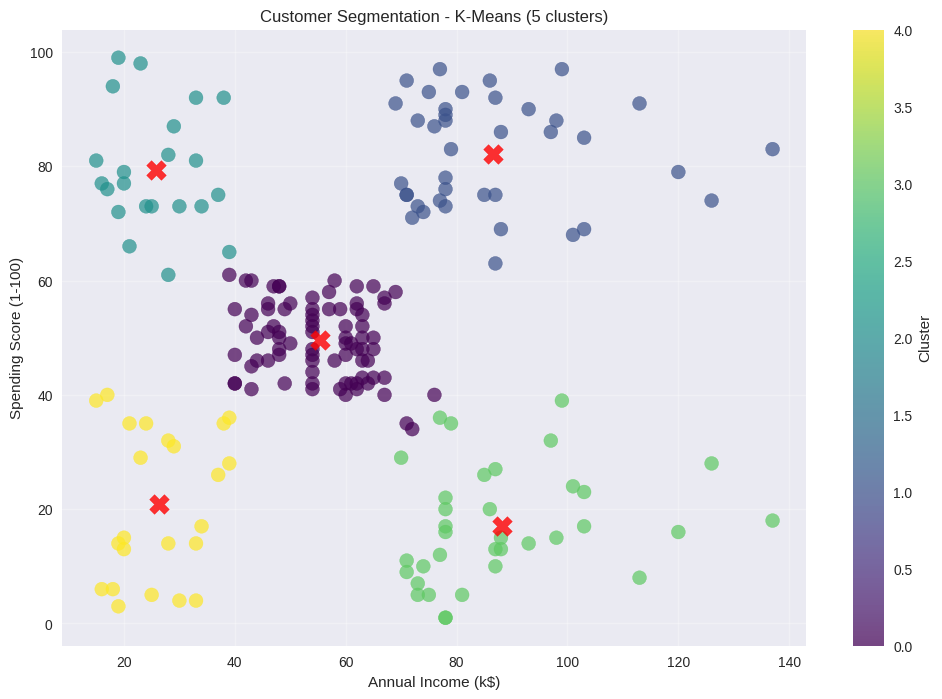

In [15]:
# K-Means clustering function
def kmeans_clustering(X, X_scaled, n_clusters, scaler):
    print("="*50)
    print("K-MEANS CLUSTERING")
    print("="*50)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # Add labels to original dataframe
    X_kmeans = X.copy()
    X_kmeans['Cluster'] = kmeans_labels

    # Visualize clusters
    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(X_kmeans['AnnualIncome'], X_kmeans['SpendingScore'],
                         c=X_kmeans['Cluster'], cmap='viridis', s=100, alpha=0.7)

    # Cluster centers (denormalized)
    centers = kmeans.cluster_centers_
    centers_original = scaler.inverse_transform(centers)
    plt.scatter(centers_original[:, 0], centers_original[:, 1], c='red', s=200, alpha=0.8, marker='X')

    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'Customer Segmentation - K-Means ({n_clusters} clusters)')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.show()

    return kmeans_labels, X_kmeans

# Apply K-Means clustering
kmeans_labels, X_kmeans = kmeans_clustering(X, X_scaled, optimal_clusters, scaler)

**7) DBSCAN Clustering**

Apply DBSCAN clustering algorithm for comparison with density-based approach.

DBSCAN CLUSTERING
Number of clusters found: 2
Number of noise points: 8


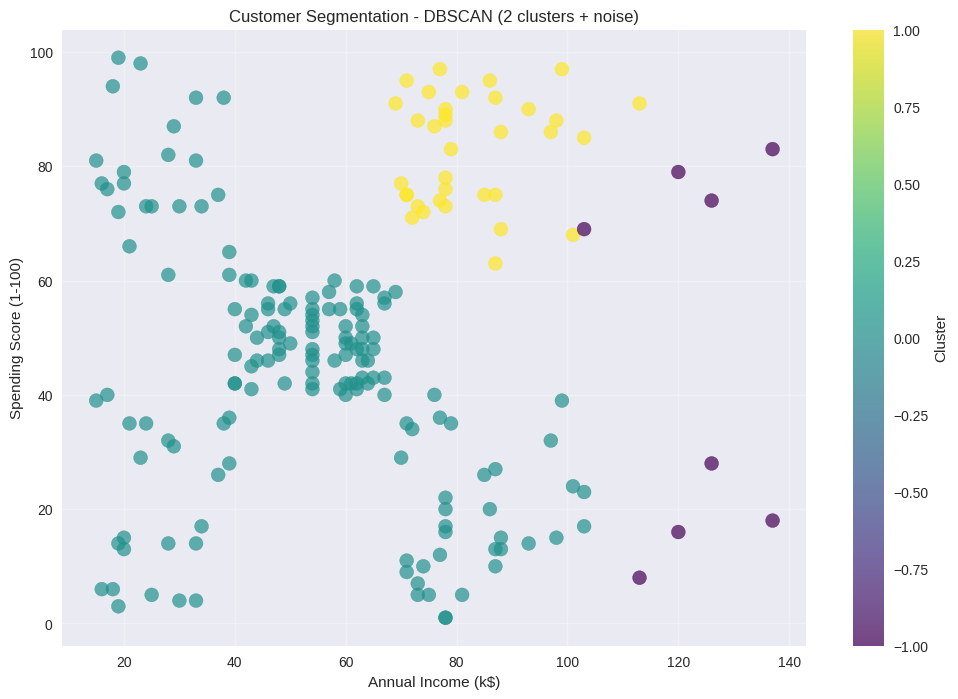

In [16]:
# DBSCAN clustering function
def dbscan_clustering(X, X_scaled):
    print("="*50)
    print("DBSCAN CLUSTERING")
    print("="*50)

    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)

    # Number of clusters (excluding noise)
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)

    print(f"Number of clusters found: {n_clusters}")
    print(f"Number of noise points: {n_noise}")

    # Visualize DBSCAN clusters
    X_dbscan = X.copy()
    X_dbscan['Cluster'] = dbscan_labels

    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(X_dbscan['AnnualIncome'], X_dbscan['SpendingScore'],
                         c=X_dbscan['Cluster'], cmap='viridis', s=100, alpha=0.7)

    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'Customer Segmentation - DBSCAN ({n_clusters} clusters + noise)')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.show()

    return dbscan_labels, X_dbscan

# Apply DBSCAN clustering
dbscan_labels, X_dbscan = dbscan_clustering(X, X_scaled)

**8) Hierarchical Clustering**

Apply hierarchical clustering algorithm for comparison.

HIERARCHICAL CLUSTERING


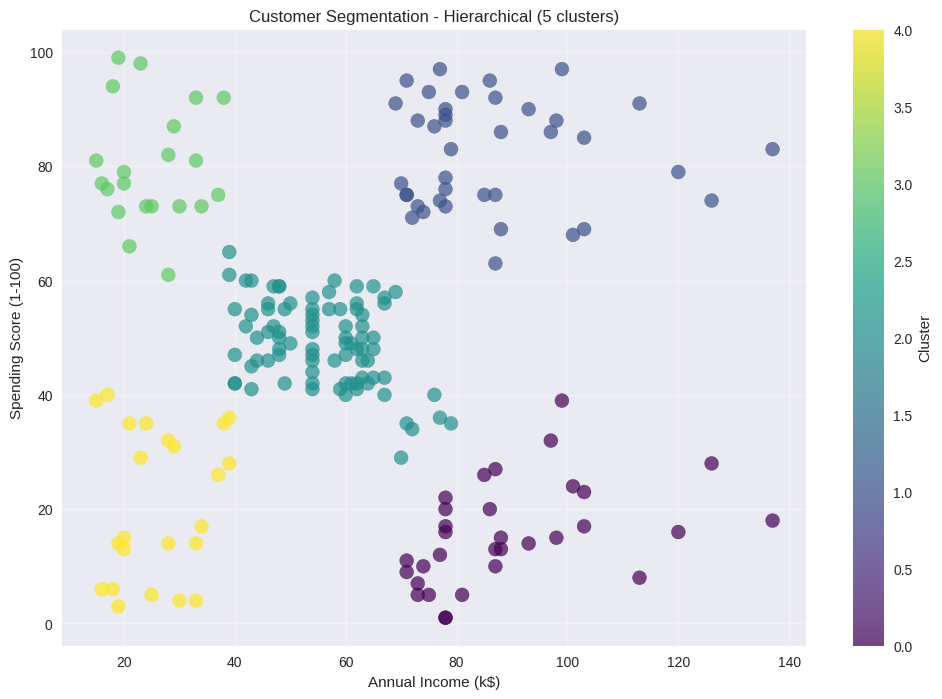

In [17]:
# Hierarchical clustering function
def hierarchical_clustering(X, X_scaled, n_clusters):
    print("="*50)
    print("HIERARCHICAL CLUSTERING")
    print("="*50)

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)

    X_hierarchical = X.copy()
    X_hierarchical['Cluster'] = hierarchical_labels

    # Visualization
    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(X_hierarchical['AnnualIncome'], X_hierarchical['SpendingScore'],
                         c=X_hierarchical['Cluster'], cmap='viridis', s=100, alpha=0.7)

    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'Customer Segmentation - Hierarchical ({n_clusters} clusters)')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.show()

    return hierarchical_labels, X_hierarchical

# Apply hierarchical clustering
hierarchical_labels, X_hierarchical = hierarchical_clustering(X, X_scaled, optimal_clusters)

**9) Cluster Analysis - K-Means**

Analyze and visualize the customer segments obtained from K-Means clustering.

CLUSTER ANALYSIS - K-MEANS
Cluster statistics:
         Income_Mean  Income_Std  Income_Min  Income_Max  Spending_Mean  \
Cluster                                                                   
0              55.30        8.99          39          76          49.52   
1              86.54       16.31          69         137          82.13   
2              25.73        7.57          15          39          79.36   
3              88.20       16.40          70         137          17.11   
4              26.30        7.89          15          39          20.91   

         Spending_Std  Spending_Min  Spending_Max  Age_Mean  Age_Std  \
Cluster                                                                
0                6.53            34            61     42.72    16.45   
1                9.36            63            97     32.69     3.73   
2               10.50            61            99     25.27     5.26   
3                9.95             1            39     41.11    11.3

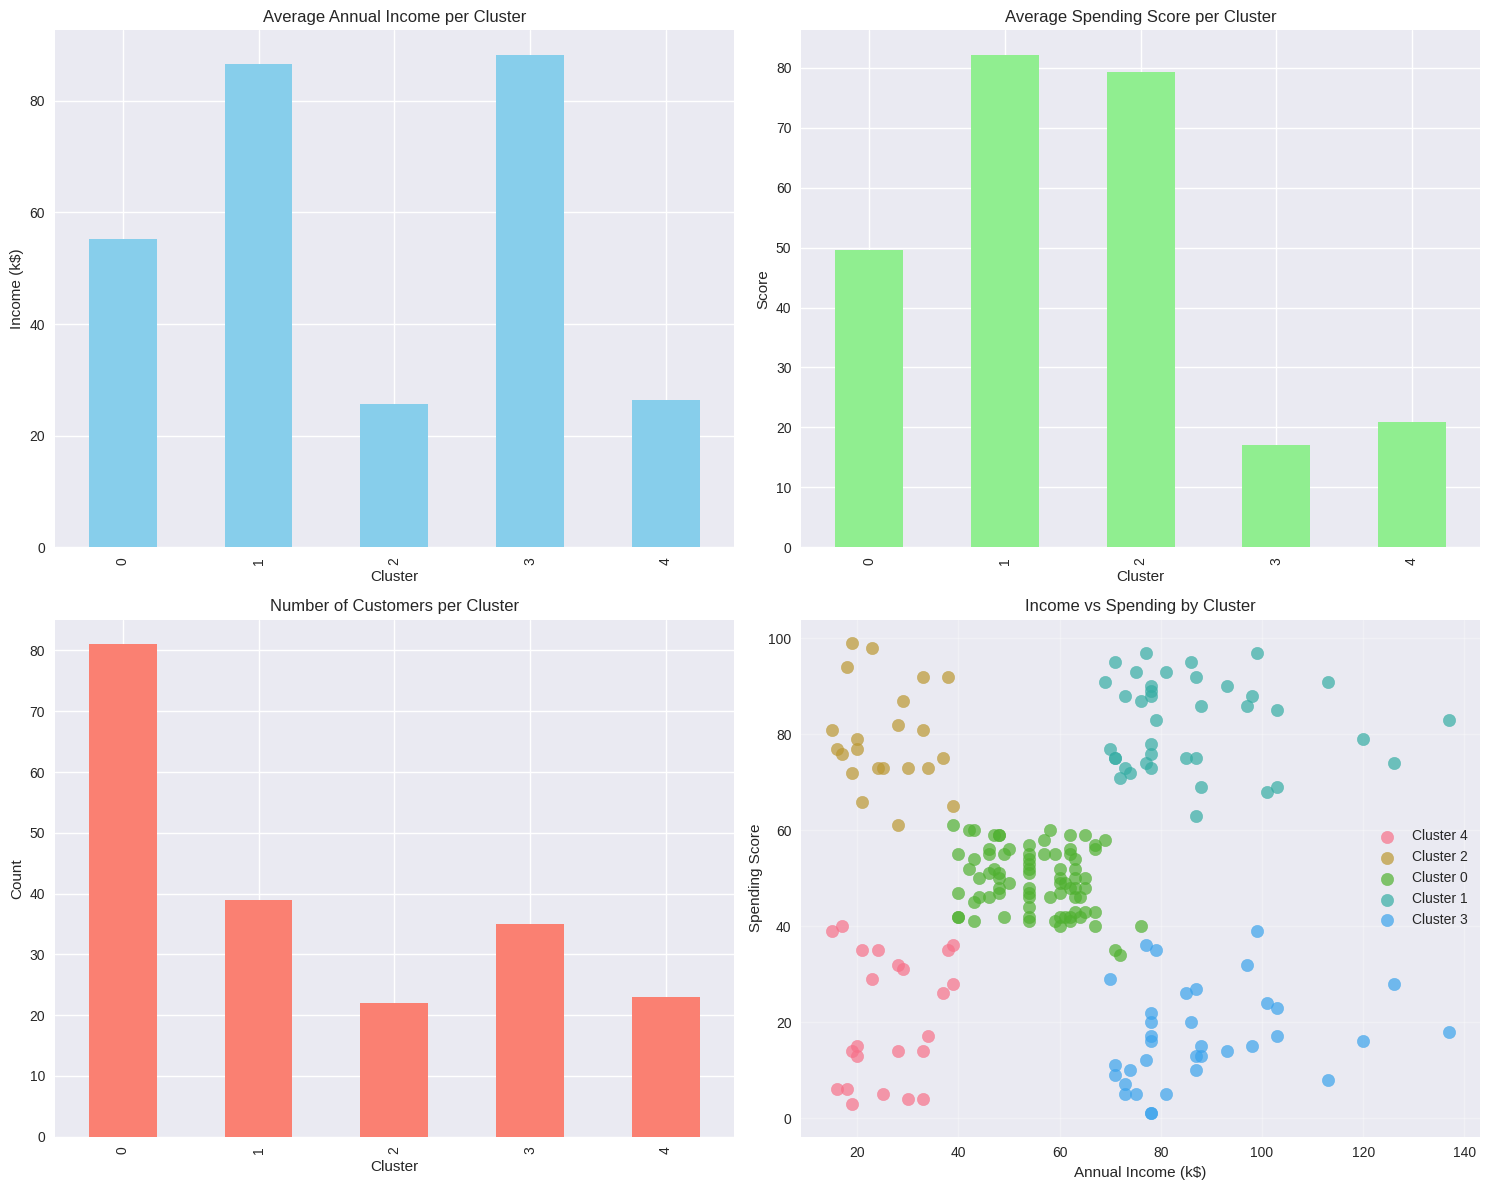

In [18]:
# Cluster analysis function
def analyze_clusters(df, labels, method_name):
    print("="*50)
    print(f"CLUSTER ANALYSIS - {method_name.upper()}")
    print("="*50)

    analysis_df = df.copy()
    analysis_df['Cluster'] = labels

    # Statistics per cluster
    cluster_stats = analysis_df.groupby('Cluster').agg({
        'AnnualIncome': ['mean', 'std', 'min', 'max'],
        'SpendingScore': ['mean', 'std', 'min', 'max'],
        'Age': ['mean', 'std'],
        'CustomerID': 'count'
    }).round(2)

    cluster_stats.columns = ['Income_Mean', 'Income_Std', 'Income_Min', 'Income_Max',
                           'Spending_Mean', 'Spending_Std', 'Spending_Min', 'Spending_Max',
                           'Age_Mean', 'Age_Std', 'N_Customers']

    print("Cluster statistics:")
    print(cluster_stats)

    # Visualize cluster characteristics
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Average income per cluster
    cluster_stats['Income_Mean'].plot(kind='bar', ax=axes[0,0], color='skyblue')
    axes[0,0].set_title('Average Annual Income per Cluster')
    axes[0,0].set_ylabel('Income (k$)')

    # Average spending score per cluster
    cluster_stats['Spending_Mean'].plot(kind='bar', ax=axes[0,1], color='lightgreen')
    axes[0,1].set_title('Average Spending Score per Cluster')
    axes[0,1].set_ylabel('Score')

    # Number of customers per cluster
    cluster_stats['N_Customers'].plot(kind='bar', ax=axes[1,0], color='salmon')
    axes[1,0].set_title('Number of Customers per Cluster')
    axes[1,0].set_ylabel('Count')

    # Income vs spending relationship per cluster
    for cluster in analysis_df['Cluster'].unique():
        cluster_data = analysis_df[analysis_df['Cluster'] == cluster]
        axes[1,1].scatter(cluster_data['AnnualIncome'], cluster_data['SpendingScore'],
                         label=f'Cluster {cluster}', alpha=0.7, s=80)

    axes[1,1].set_xlabel('Annual Income (k$)')
    axes[1,1].set_ylabel('Spending Score')
    axes[1,1].set_title('Income vs Spending by Cluster')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return cluster_stats

# Analyze K-Means clusters
kmeans_stats = analyze_clusters(df, kmeans_labels, "K-Means")

**10) Cluster Analysis - DBSCAN**

Analyze and visualize the customer segments obtained from DBSCAN clustering.

CLUSTER ANALYSIS - DBSCAN
Cluster statistics:
         Income_Mean  Income_Std  Income_Min  Income_Max  Spending_Mean  \
Cluster                                                                   
-1            122.75       11.51         103         137          46.88   
 0             52.49       21.81          15         103          43.10   
 1             82.54       10.93          69         113          82.80   

         Spending_Std  Spending_Min  Spending_Max  Age_Mean  Age_Std  \
Cluster                                                                
-1              32.11             8            83     35.75     6.50   
 0              22.25             1            99     40.37    15.25   
 1               9.50            63            97     32.74     3.89   

         N_Customers  
Cluster               
-1                 8  
 0               157  
 1                35  


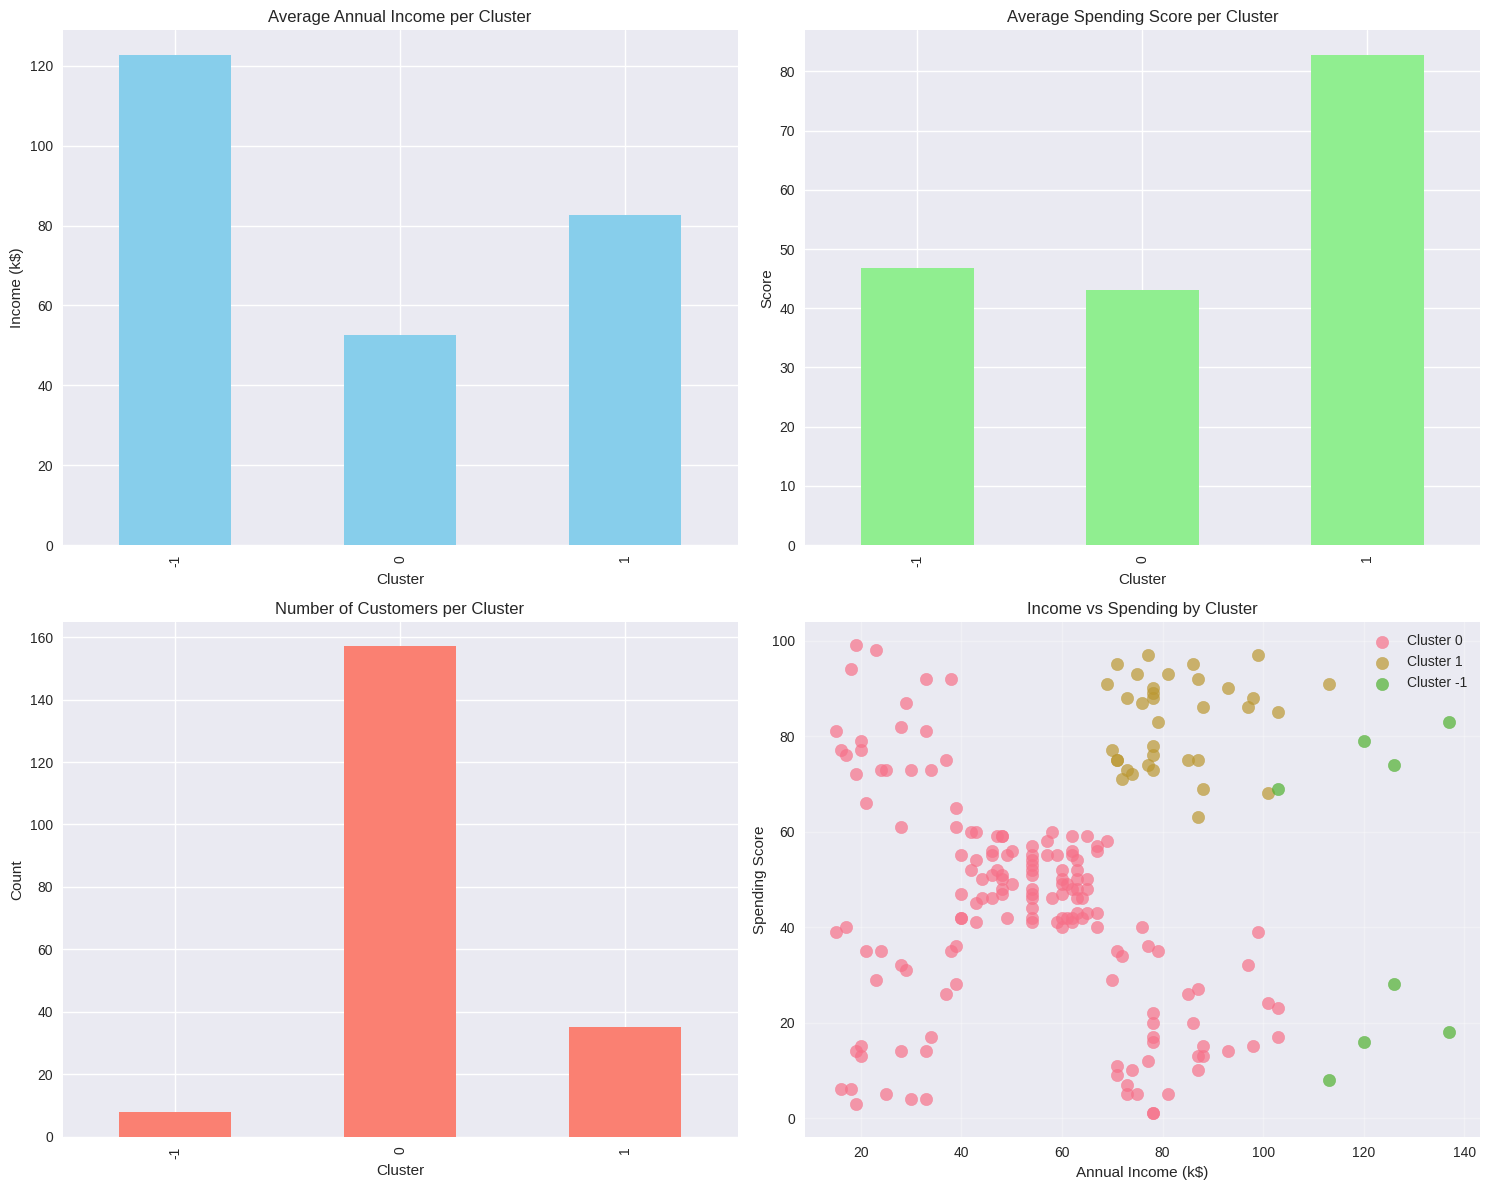

In [19]:
# Analyze DBSCAN clusters
dbscan_stats = analyze_clusters(df, dbscan_labels, "DBSCAN")

**11) Cluster Analysis - Hierarchical**

Analyze and visualize the customer segments obtained from hierarchical clustering.

CLUSTER ANALYSIS - HIERARCHICAL
Cluster statistics:
         Income_Mean  Income_Std  Income_Min  Income_Max  Spending_Mean  \
Cluster                                                                   
0              89.41       16.61          71         137          15.59   
1              86.54       16.31          69         137          82.13   
2              55.81        9.73          39          79          49.13   
3              25.10        7.13          15          38          80.05   
4              26.30        7.89          15          39          20.91   

         Spending_Std  Spending_Min  Spending_Max  Age_Mean  Age_Std  \
Cluster                                                                
0                8.94             1            39     41.00    11.04   
1                9.36            63            97     32.69     3.73   
2                7.28            29            65     42.48    16.40   
3               10.25            61            99     25.33   

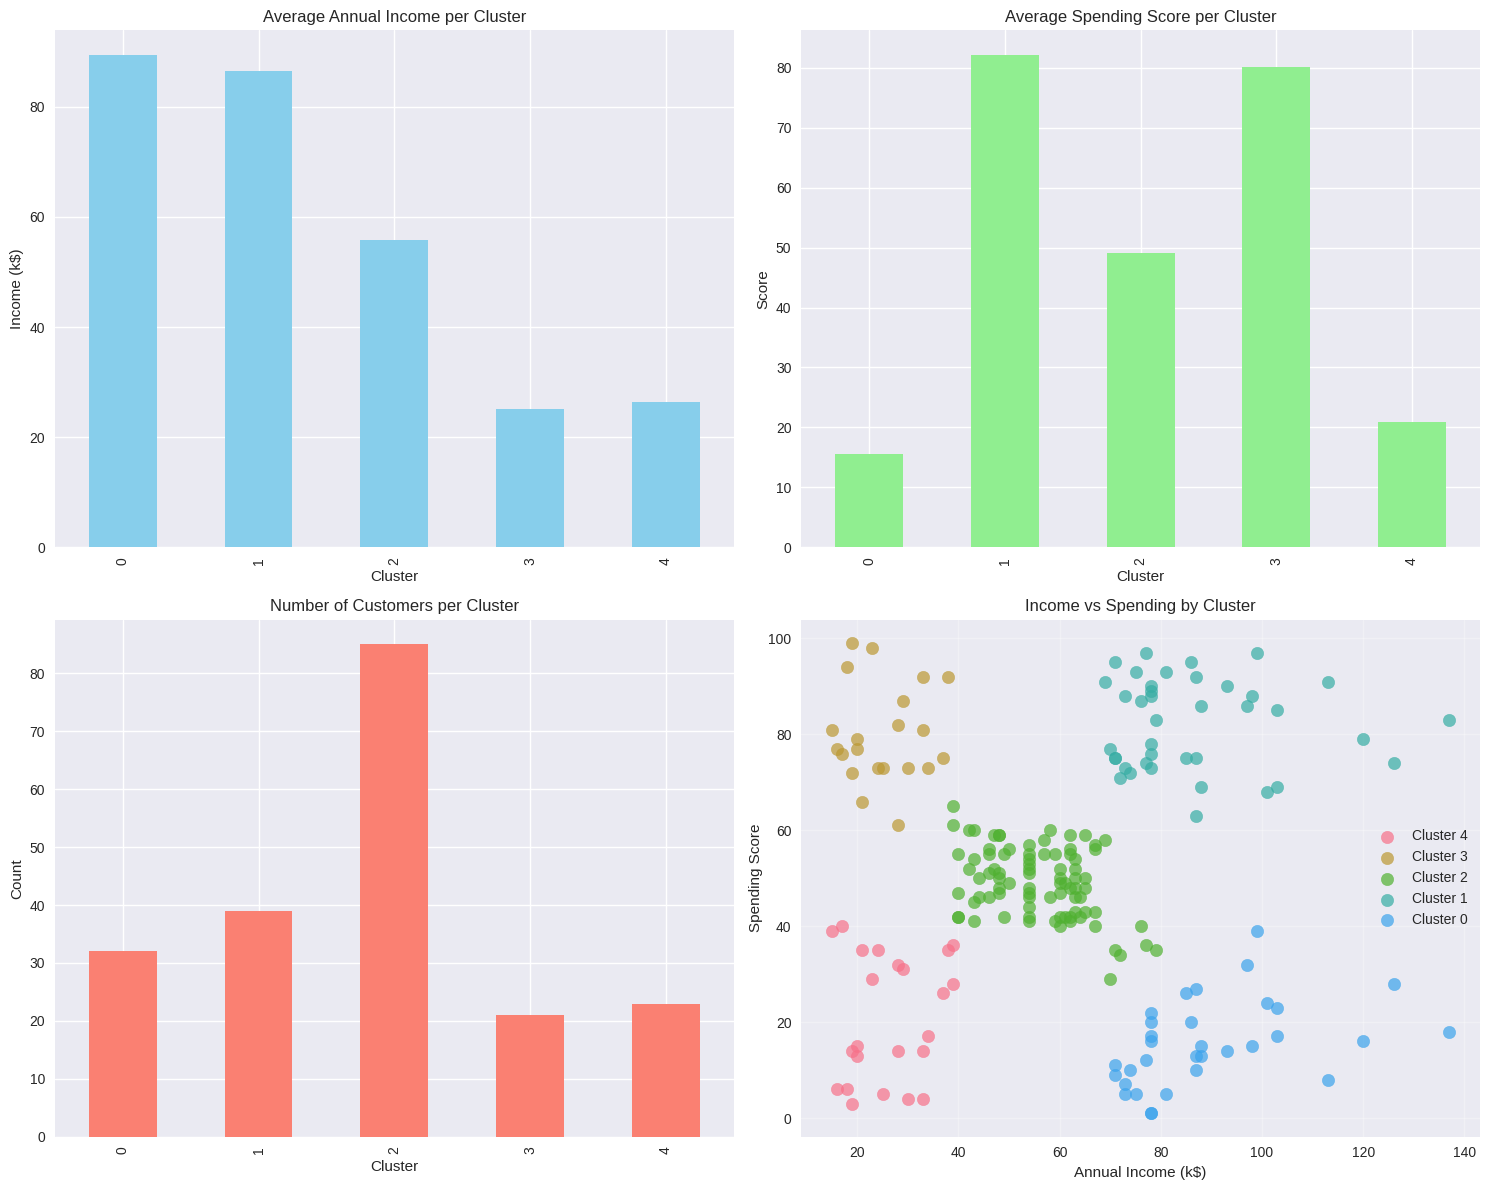

In [20]:
# Analyze hierarchical clusters
hierarchical_stats = analyze_clusters(df, hierarchical_labels, "Hierarchical")

***12) Method Comparison***

Compare the performance of different clustering algorithms using silhouette scores.

In [21]:
# Compare clustering methods
def compare_clustering_methods(X_scaled, kmeans_labels, dbscan_labels, hierarchical_labels):
    print("="*50)
    print("CLUSTERING METHODS COMPARISON")
    print("="*50)

    # Calculate silhouette scores
    kmeans_score = silhouette_score(X_scaled, kmeans_labels)

    # For DBSCAN, exclude noise for score calculation
    if -1 in dbscan_labels:
        valid_points = dbscan_labels != -1
        dbscan_score = silhouette_score(X_scaled[valid_points], dbscan_labels[valid_points])
    else:
        dbscan_score = silhouette_score(X_scaled, dbscan_labels)

    hierarchical_score = silhouette_score(X_scaled, hierarchical_labels)

    comparison = pd.DataFrame({
        'Method': ['K-Means', 'DBSCAN', 'Hierarchical'],
        'Silhouette Score': [kmeans_score, dbscan_score, hierarchical_score],
        'Number of Clusters': [
            len(set(kmeans_labels)),
            len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0),
            len(set(hierarchical_labels))
        ]
    })

    print("Performance comparison:")
    print(comparison)

    return comparison

# Compare all methods
comparison = compare_clustering_methods(X_scaled, kmeans_labels, dbscan_labels, hierarchical_labels)

CLUSTERING METHODS COMPARISON
Performance comparison:
         Method  Silhouette Score  Number of Clusters
0       K-Means          0.554657                   5
1        DBSCAN          0.387558                   2
2  Hierarchical          0.553809                   5


**13) Conclusion and Recommendations**

Provide final insights and marketing recommendations based on the clustering results.

In [22]:
# Conclusion and recommendations
print("="*50)
print("CONCLUSION AND RECOMMENDATIONS")
print("="*50)

best_method = comparison.loc[comparison['Silhouette Score'].idxmax(), 'Method']
print(f"Most performant clustering method: {best_method}")

# Cluster profiling (using K-Means as reference)
print("\nCluster profiles (K-Means):")
for cluster in range(optimal_clusters):
    cluster_data = df[kmeans_labels == cluster]
    print(f"\nCluster {cluster}:")
    print(f"  - Customers: {len(cluster_data)}")
    print(f"  - Average income: {cluster_data['AnnualIncome'].mean():.2f}k$")
    print(f"  - Average spending score: {cluster_data['SpendingScore'].mean():.2f}")
    print(f"  - Average age: {cluster_data['Age'].mean():.2f} years")

    # Recommendations based on cluster
    income = cluster_data['AnnualIncome'].mean()
    spending = cluster_data['SpendingScore'].mean()

    if income > 70 and spending > 60:
        print("  → Recommendation: VIP Customers - Premium offers and personalized service")
    elif income > 70 and spending < 40:
        print("  → Recommendation: Economical Customers - Focus on value and quality")
    elif income < 40 and spending > 60:
        print("  → Recommendation: Spenders - Promotions and credit options")
    else:
        print("  → Recommendation: Standard Customers - General marketing campaigns")

print("\n" + "="*50)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*50)

CONCLUSION AND RECOMMENDATIONS
Most performant clustering method: K-Means

Cluster profiles (K-Means):

Cluster 0:
  - Customers: 81
  - Average income: 55.30k$
  - Average spending score: 49.52
  - Average age: 42.72 years
  → Recommendation: Standard Customers - General marketing campaigns

Cluster 1:
  - Customers: 39
  - Average income: 86.54k$
  - Average spending score: 82.13
  - Average age: 32.69 years
  → Recommendation: VIP Customers - Premium offers and personalized service

Cluster 2:
  - Customers: 22
  - Average income: 25.73k$
  - Average spending score: 79.36
  - Average age: 25.27 years
  → Recommendation: Spenders - Promotions and credit options

Cluster 3:
  - Customers: 35
  - Average income: 88.20k$
  - Average spending score: 17.11
  - Average age: 41.11 years
  → Recommendation: Economical Customers - Focus on value and quality

Cluster 4:
  - Customers: 23
  - Average income: 26.30k$
  - Average spending score: 20.91
  - Average age: 45.22 years
  → Recommendati